# Abalone
### Rodrigo Schulz


# Importar bibliotecas necessárias


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
file_path = '/content/abalone.data'
column_names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
df = pd.read_csv(file_path, header=None, names=column_names)

# Carregar o conjunto de dados


In [ ]:

df.head()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

# Exploração inicial dos dados
# Exibir as primeiras linhas

In [ ]:
# Verificar número de variáveis (colunas) e instâncias (linhas)
print(f"Número de variáveis: {df.shape[1]}")
print(f"Número de instâncias: {df.shape[0]}")

Número de variáveis: 9
Número de instâncias: 4177


In [ ]:
# Verificar o tipo de cada variável
print(df.info())

# Verificar a presença de valores ausentes
print(df.isnull().sum())

# Realizar análise descritiva básica
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
None
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64
            Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000 

# Visualização dos dados
# Gráficos para compreender os dados

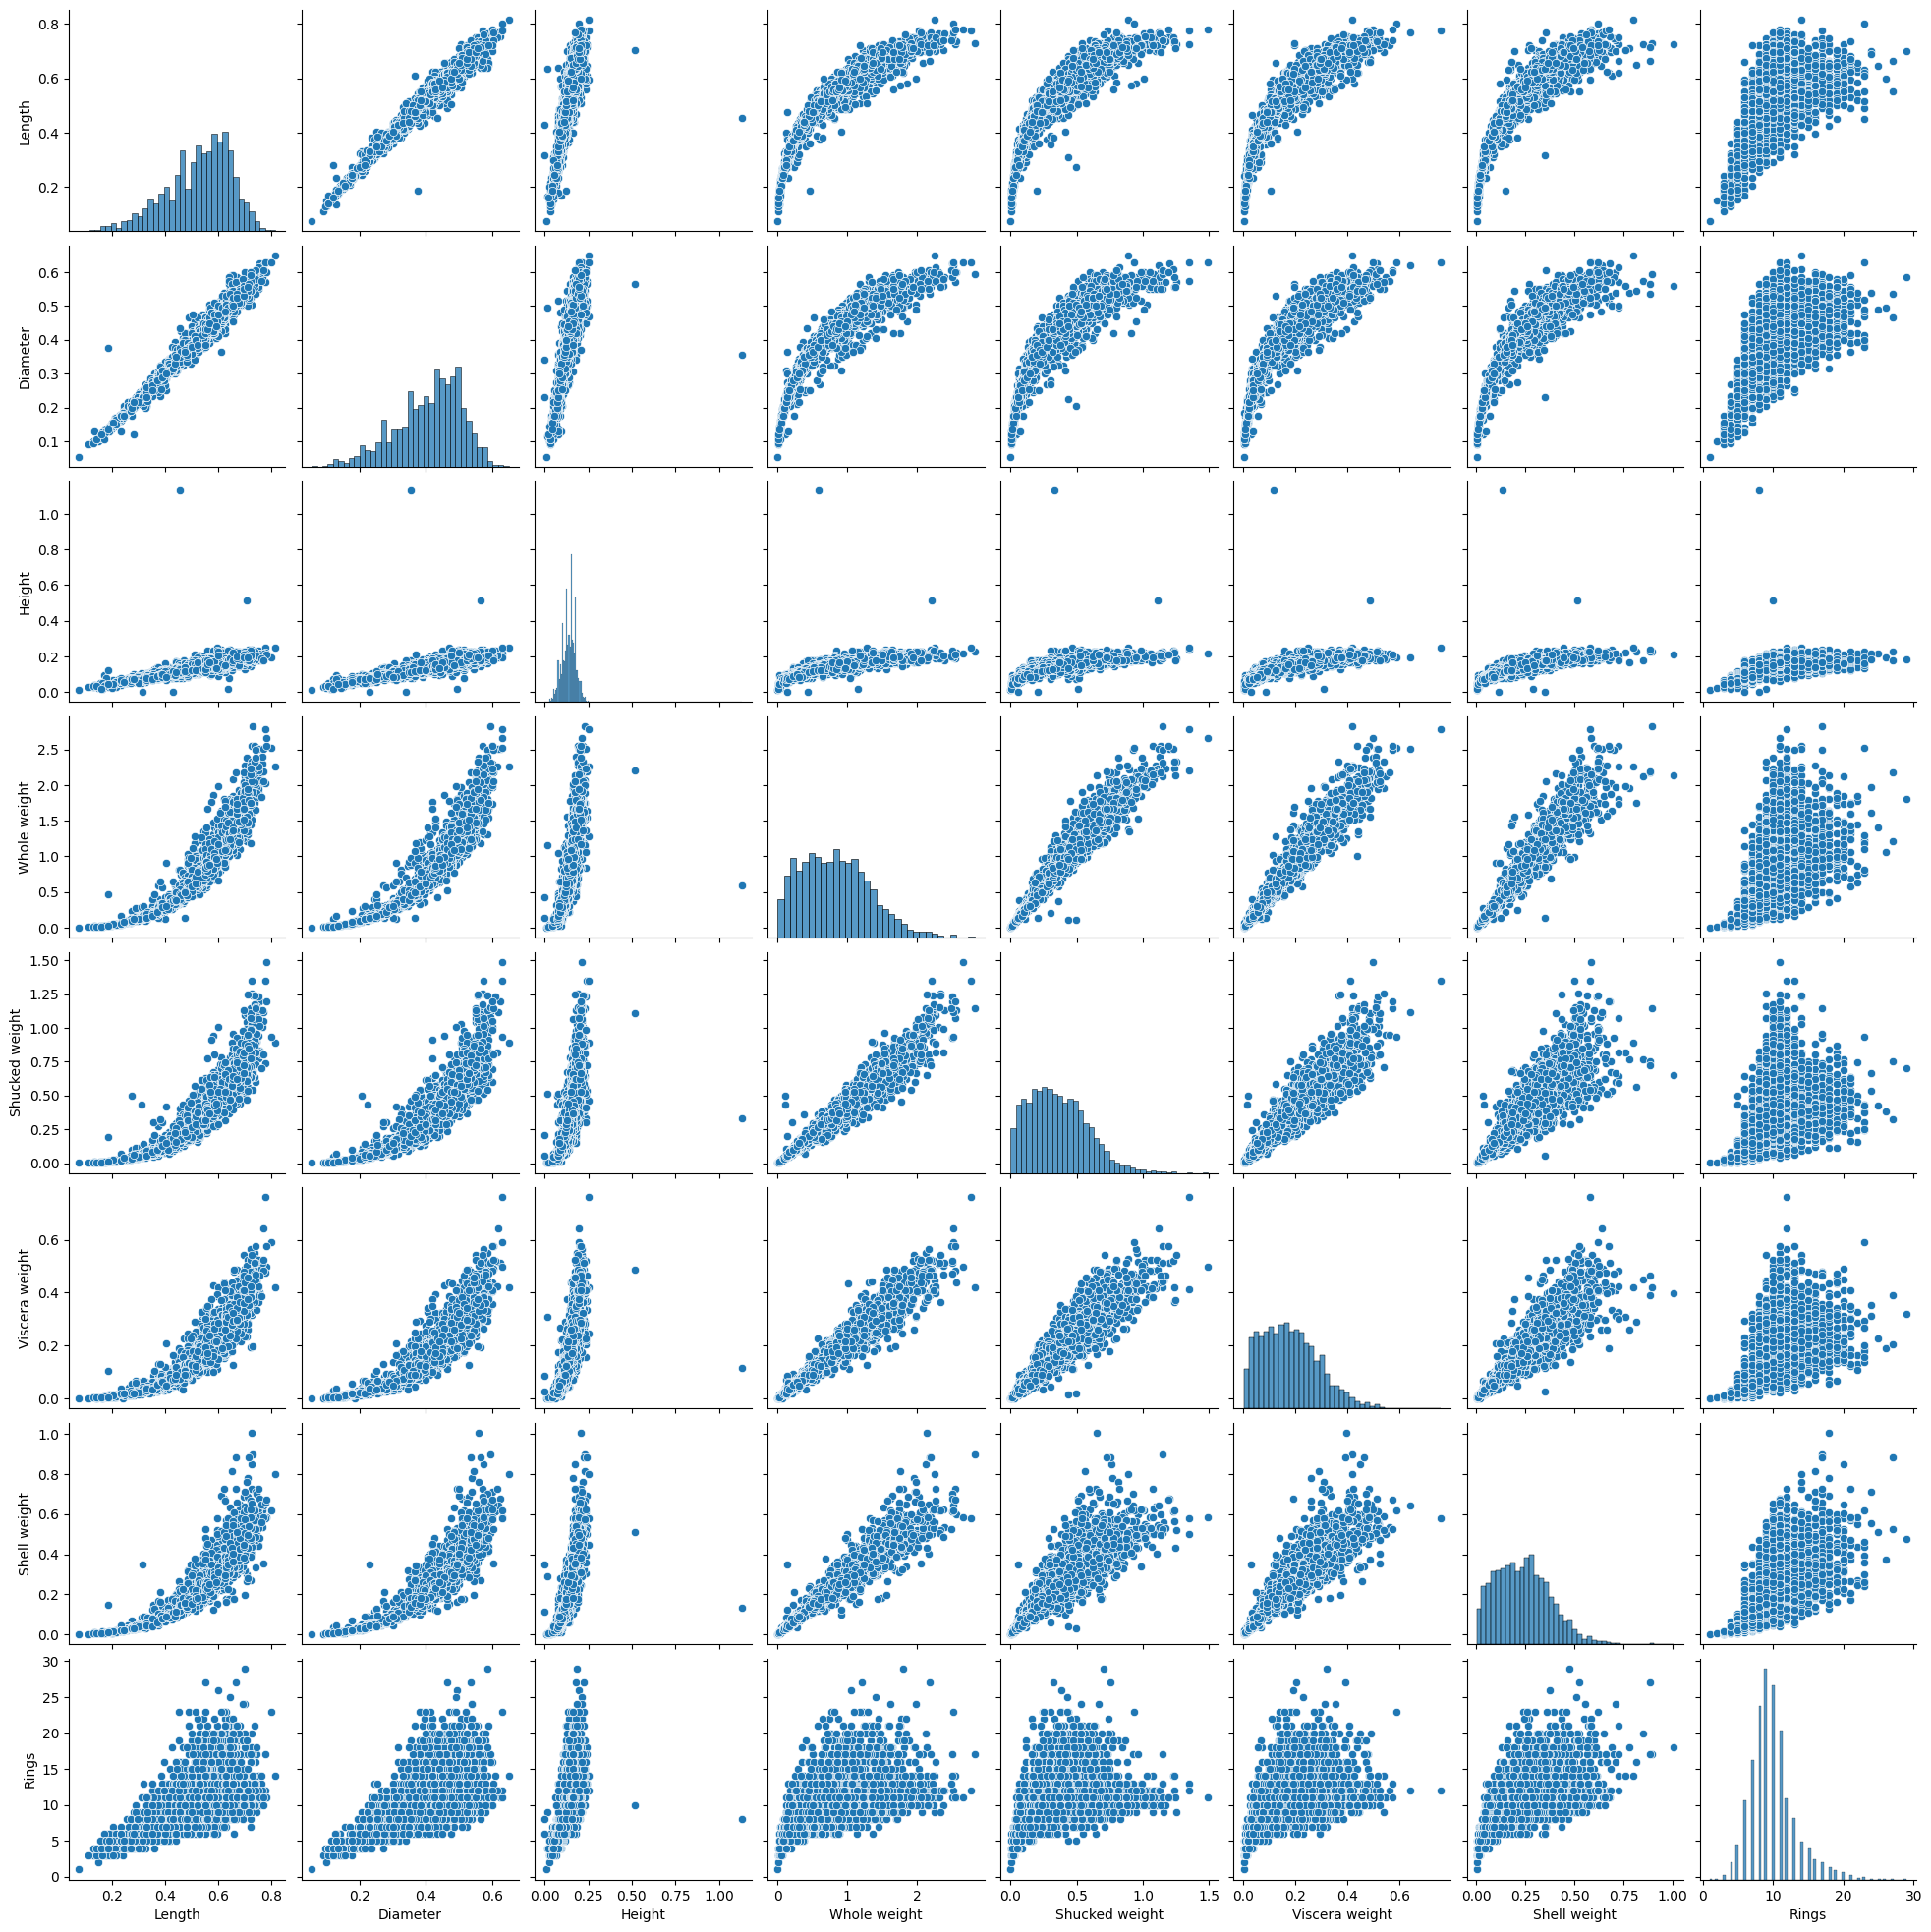

In [ ]:
sns.pairplot(df)
plt.show()

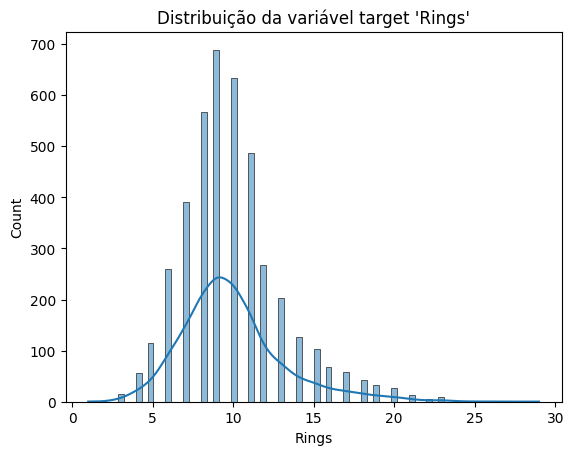

In [ ]:
# Distribuição do número de anéis (variável target)
sns.histplot(df['Rings'], kde=True)
plt.title("Distribuição da variável target 'Rings'")
plt.show()

# Preparação dos dados para o modelo de regressão linear múltipla


In [ ]:
# Converter a variável 'Sex' em dummy variables
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

# Separar as variáveis independentes (features) e dependente (target)
X = df.drop('Rings', axis=1)
y = df['Rings']

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Desenvolvimento do modelo de regressão linear
model = LinearRegression()

# Treinamento do modelo
model.fit(X_train, y_train)

LinearRegression()

# Avaliação do modelo


In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Métricas de avaliação: R² e RMSE
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

In [ ]:
print(f"R² do conjunto de treino: {r2_train}")
print(f"R² do conjunto de teste: {r2_test}")
print(f"RMSE do conjunto de treino: {rmse_train}")
print(f"RMSE do conjunto de teste: {rmse_test}")

R² do conjunto de treino: 0.5402624684140915
R² do conjunto de teste: 0.5288038218248527
RMSE do conjunto de treino: 2.195693473985605
RMSE do conjunto de teste: 2.187415973839705


In [ ]:
# Discussão dos resultados
print("Discussão: O modelo de regressão linear múltipla apresentou uma performance R² de {:.2f} no conjunto de teste. Isso indica que o modelo explica aproximadamente {:.2f}% da variabilidade nos dados de teste. No entanto, o RMSE sugere um erro médio elevado, indicando que o modelo pode não estar capturando todas as variáveis explicativas corretamente.".format(r2_test*100, r2_test*100))


Discussão: O modelo de regressão linear múltipla apresentou uma performance R² de 52.88 no conjunto de teste. Isso indica que o modelo explica aproximadamente 52.88% da variabilidade nos dados de teste. No entanto, o RMSE sugere um erro médio elevado, indicando que o modelo pode não estar capturando todas as variáveis explicativas corretamente.
